In [1]:
import pandas as pd

In [2]:
df=pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])

In [3]:
df.loc[0]=[1200,1,0,0,2,'Skinny']
df.loc[1]=[2800,1,1,1,1,'Normal']
df.loc[2]=[3500,2,2,1,0,'Fat']
df.loc[3]=[1400,0,1,0,3,'Skinny']
df.loc[4]=[5000,2,2,2,0,'Fat']
df.loc[5]=[1300,0,0,1,2,'Skinny']
df.loc[6]=[3000,1,0,1,1,'Normal']
df.loc[7]=[4000,2,2,2,0,'Fat']
df.loc[8]=[2600,0,2,0,0,'Normal']
# df.loc[9]=[3000,1,0,0,2,'Skinny']

In [5]:
df.head(9)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal


In [14]:
x=df[['calory','breakfast','lunch','dinner','exercise']]
y=df['body_shape']
x.head(9)


,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [15]:
y.head(9)

0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
5    Skinny
6    Normal
7       Fat
8    Normal
Name: body_shape, dtype: object

In [24]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
print(x_std)

[[-1.2653243   0.         -1.27000127 -1.20604538  0.9486833 ]
 [ 0.03615212  0.         -0.12700013  0.15075567  0.        ]
 [ 0.60554806  1.22474487  1.01600102  0.15075567 -0.9486833 ]
 [-1.10263975 -1.22474487 -0.12700013 -1.20604538  1.8973666 ]
 [ 1.8256822   1.22474487  1.01600102  1.50755672 -0.9486833 ]
 [-1.18398202 -1.22474487 -1.27000127  0.15075567  0.9486833 ]
 [ 0.19883668  0.         -1.27000127  0.15075567  0.        ]
 [ 1.01225944  1.22474487  1.01600102  1.50755672 -0.9486833 ]
 [-0.12653243 -1.22474487  1.01600102 -1.20604538 -0.9486833 ]]


In [26]:
import numpy as np
features=x_std.T
covariance_matrix=np.cov(features)
print(covariance_matrix)

[[ 1.125       0.89661182  0.79544692  0.9043822  -0.94530872]
 [ 0.89661182  1.125       0.5249568   0.83086756 -0.72618438]
 [ 0.79544692  0.5249568   1.125       0.40924553 -0.81325957]
 [ 0.9043822   0.83086756  0.40924553  1.125      -0.64358725]
 [-0.94530872 -0.72618438 -0.81325957 -0.64358725  1.125     ]]


In [27]:
eig_values,eig_vectors=np.linalg.eig(covariance_matrix)
print('Eigen values\n%s'%eig_values)
print('Eigen vectors\n%s'%eig_vectors)

Eigen values
[4.14954593 0.84913167 0.07674348 0.29017282 0.2594061 ]
Eigen vectors
[[ 0.50590889  0.02328823  0.84738948 -0.15935007 -0.00724503]
 [ 0.44518969  0.36370838 -0.12504452  0.79483085  0.14876204]
 [ 0.3916377  -0.6861032  -0.21885512 -0.04666511  0.57079516]
 [ 0.42458617  0.55212131 -0.37683892 -0.58346177  0.18014835]
 [-0.46066129  0.30265216  0.27638706  0.01569107  0.78711932]]


In [32]:
eig_values[0]/sum(eig_values)

0.7376970539448724

In [69]:
projected_x=x_std.dot(eig_vectors[:,0:1])
print(projected_x.shape)


(9, 1)


In [70]:
result=pd.DataFrame(projected_x,columns=['PC1'])
result['y-axis']=0.0
result['label']=y

Text(0.5,1,'PCA result')

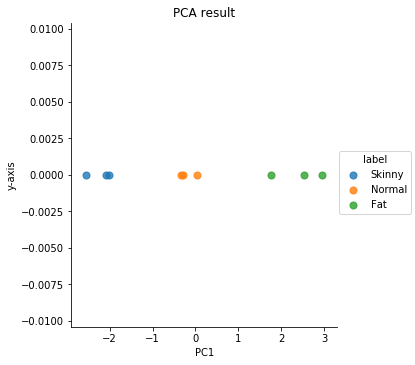

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Text(0.5,1,'PCA result')
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={"s":50},hue="label")
plt.title('PCA result')

In [72]:
from sklearn import decomposition

In [74]:
pca=decomposition.PCA(n_components=1)
projected_x=pca.fit_transform(x_std)

In [75]:
result=pd.DataFrame(projected_x,columns=['PC1'])
result['y-axis']=0.0
result['label']=y

Text(0.5,1,'PCA result')

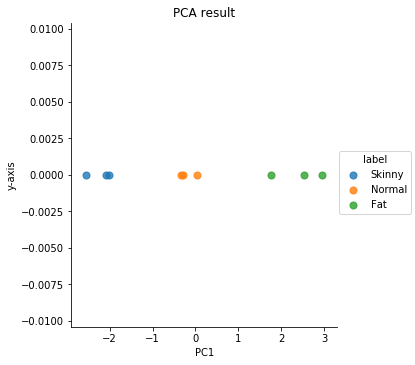

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Text(0.5,1,'PCA result')
sns.lmplot('PC1','y-axis',data=result,fit_reg=False,scatter_kws={"s":50},hue="label")
plt.title('PCA result')